   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0 

C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vaish\anaconda3\new\lib\site-packa

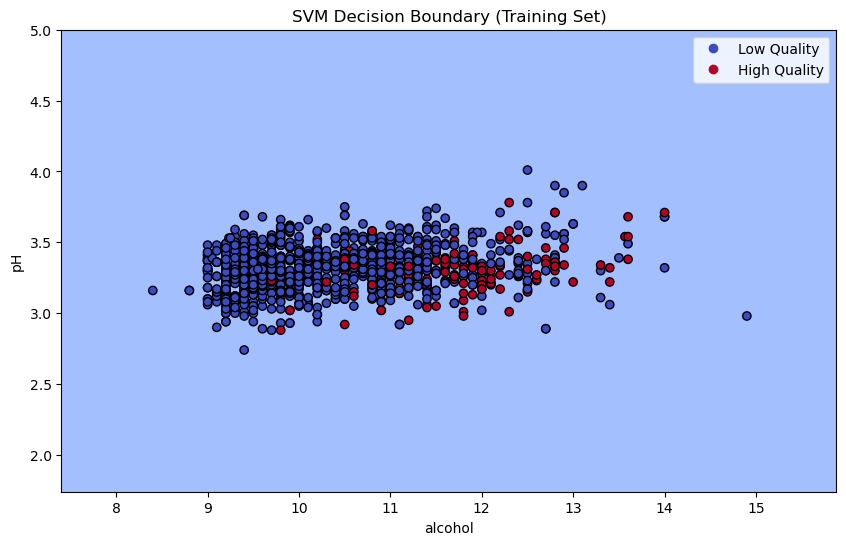

C:\Users\vaish\anaconda3\new\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


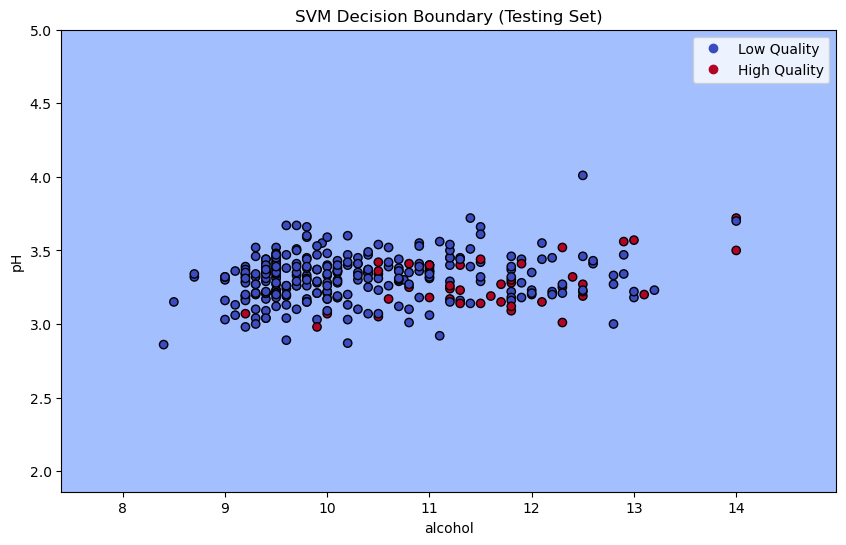

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


file_path = "C:/Users/vaish/Downloads/archive (1)/winequality-red.csv"
data = pd.read_csv(file_path)



data['quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)


print(data.head())


print(data.isnull().sum())


features = ['alcohol', 'pH']
X = data[features]
y = data['quality']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train_scaled, y_train)


y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
y_test_prob = model.predict_proba(X_test_scaled)[:, 1]


conf_matrix = confusion_matrix(y_test, y_test_pred)
class_report = classification_report(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_prob)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"ROC AUC Score: {roc_auc}")


def plot_decision_boundary(model, X, y, features, scaler, title):
    
    h = .02
    x_min, x_max = X[features[0]].min() - 1, X[features[0]].max() + 1
    y_min, y_max = X[features[1]].min() - 1, X[features[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    
    mesh = np.c_[xx.ravel(), yy.ravel()]
    mesh_scaled = scaler.transform(mesh)

    
    Z = model.predict(mesh_scaled)
    Z = Z.reshape(xx.shape)

    # Plot the contour and training examples
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    scatter = plt.scatter(X[features[0]], X[features[1]], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Low Quality', 'High Quality'])
    plt.show()


plot_decision_boundary(model, pd.DataFrame(X_train, columns=features), y_train, features, scaler, 'SVM Decision Boundary (Training Set)')


plot_decision_boundary(model, pd.DataFrame(X_test, columns=features), y_test, features, scaler, 'SVM Decision Boundary (Testing Set)')
